In [1]:
import networkx as nx
import solver as sv
import matplotlib.pyplot as plt
from easygui import fileopenbox

In [2]:
def load_edges_with_cost(file_path): 
    data = sv.extract_data_from_file(file_path)
    cost = data[-2]
    time = data[-1]
    edge_with_cost_list = []

    # Iterate over the keys (edges) in the first dictionary
    for edge, cost1 in cost.items():
        # Check if the edge is present in the second dictionary
        if edge in time:
            cost2 = time[edge]
            edge_with_cost = (edge[0], edge[1], (cost1, cost2))
            edge_with_cost_list.append(edge_with_cost)

    return edge_with_cost_list

In [30]:
def create_graph_with_costs(file_path):

    edges_with_costs = load_edges_with_cost(file_path)
    # Create an empty graph
    G = nx.DiGraph()

    # Add nodes to the graph (optional, but useful for visualization)
    nodes = set()
    for edge in edges_with_costs:
        nodes.add(edge[0])
        nodes.add(edge[1])
    G.add_nodes_from(nodes)

    # Add edges with edge costs
    for edge in edges_with_costs:
        G.add_edge(edge[0], edge[1], weight=edge[2][0], additional_info=edge[2][1])

    return G

def visualize_graph(G):
    # Draw the graph
    pos = nx.spring_layout(G)  # Layout algorithm for visualization
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
    additional_edge_labels = {(u, v): G[u][v]['additional_info'] for u, v in G.edges()}

    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=additional_edge_labels, font_color='green', font_size=8)

    plt.axis('off')  # Turn off the axis
    plt.show()





In [31]:
G = create_graph_with_costs("C:/Users/esteb/OneDrive - Universidad de los Andes/Documentos/ANDES/Septimo Semestre/HUC/VRP/non-stochastic/ampl/test/manual_test.txt")

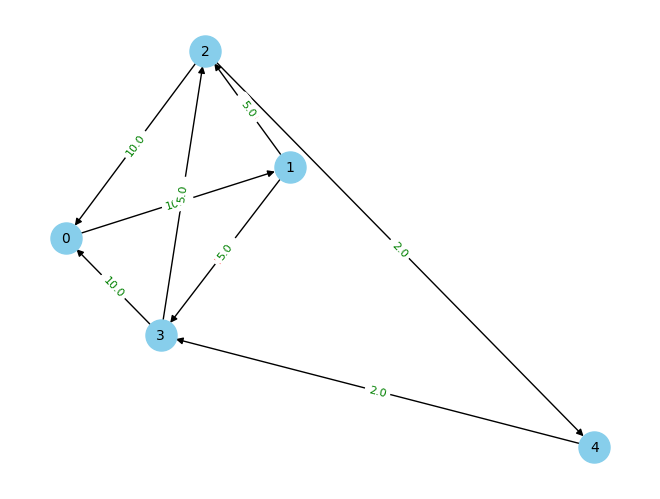

In [32]:
visualize_graph(G)